# Fandango Analysis Rating

**This notebook analyzes movie ratings from Fandango and other rating sites like Rotten Tomatoes, MetaCritic, and IMDB. It includes data visualization and comparisons between different rating systems.**
.


----
**Importing libraries**


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # For errors "use_inf_as_na option is deprecated and will be removed in a future version."

**Read CSV**

In [41]:
all_sites = pd.read_csv('all_sites_scores.csv')
fandango = pd.read_csv('fandango_scrape.csv')

### FANDANGO RATINGS.

**Сreating graph of fandango ratings and votes.**

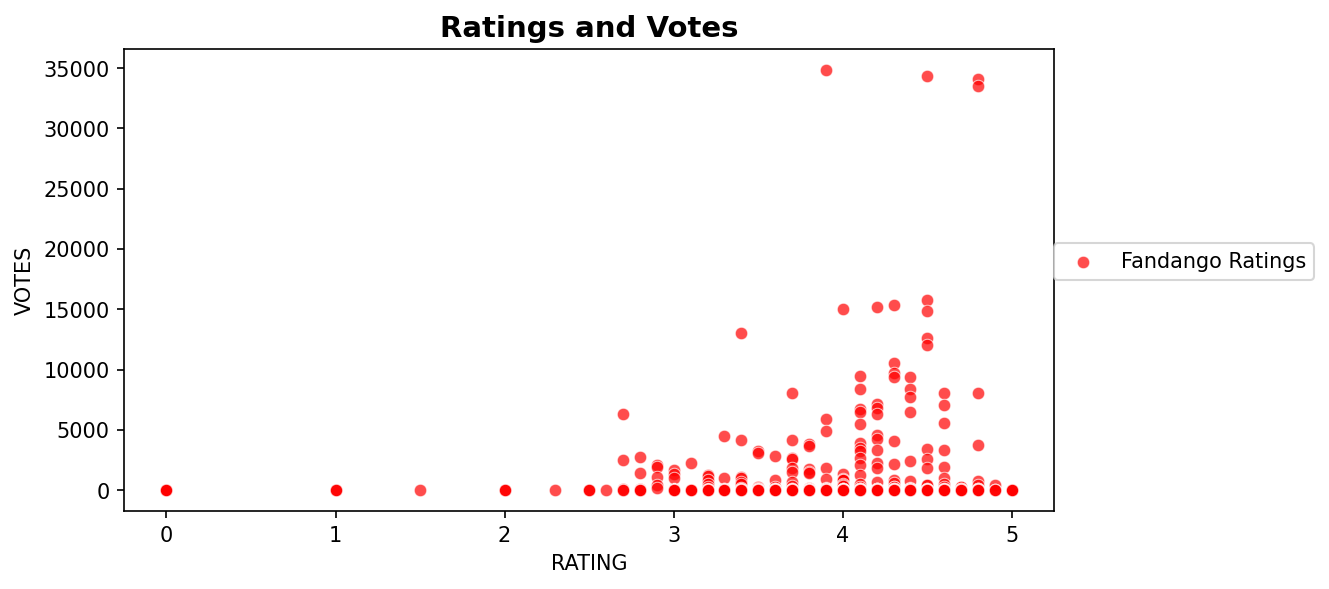

In [42]:
plt.figure(figsize=(8, 4), dpi=150)

sns.scatterplot(data=fandango, x='RATING', y='VOTES', label='Fandango Ratings', color='red', alpha=0.7)
plt.title('Ratings and Votes', fontsize=14, fontweight='bold')
plt.legend(loc=(1, 0.5))

**Create column 'year' from 'FILM' column**

In [43]:
fandango['YEAR'] = fandango['FILM'].str.extract(r'\((\d{4})\)$')

**Check how many films were released in each year.**

In [44]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

**Сreating graph of number of films per year**

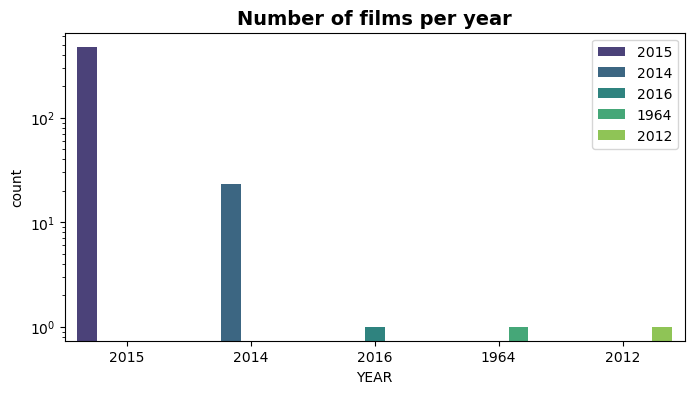

In [45]:
plt.figure(figsize=(8, 4), dpi=100)

ax = sns.countplot(data=fandango, x='YEAR', hue='YEAR', palette='viridis')
ax.set_title('Number of films per year', fontsize=14, fontweight='bold')
ax.legend(labels=fandango['YEAR'].unique())
ax.set_yscale('log')

**Filtered movies with voices**

In [46]:
filtered_movies = fandango[fandango['VOTES'] > 0]
filtered_movies = filtered_movies.replace([np.inf, -np.inf], np.nan)
filtered_movies

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**Сreating graph of distribution of ratings**

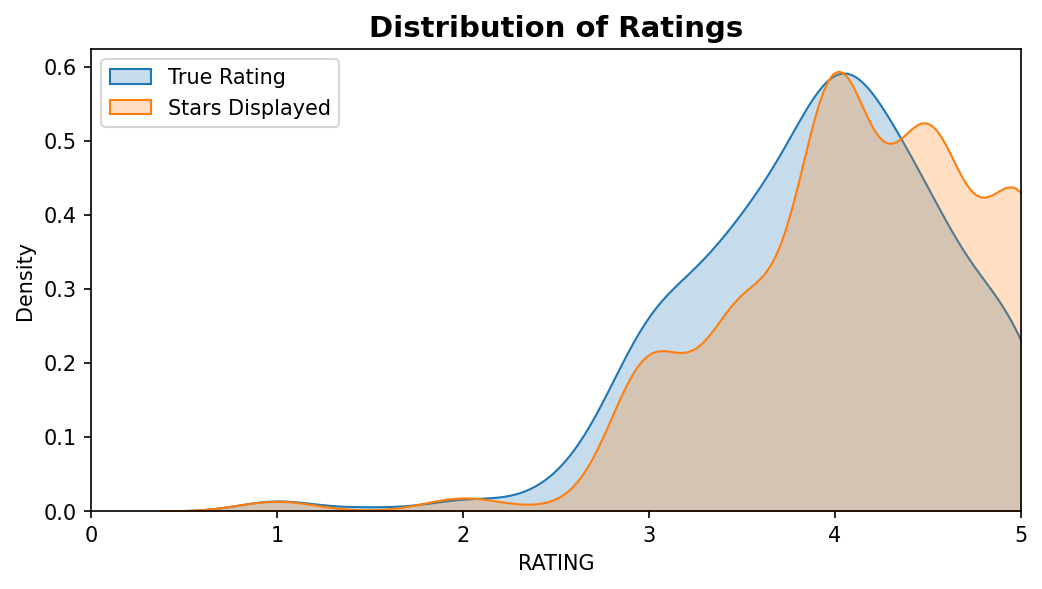

In [47]:
plt.figure(figsize=(8, 4), dpi=150)

sns.kdeplot(data=filtered_movies, x='RATING', fill=True, label='True Rating')
sns.kdeplot(data=filtered_movies, x='STARS', fill=True, label='Stars Displayed')

plt.title('Distribution of Ratings', fontsize=14, fontweight='bold')
plt.xlim(0, 5)
plt.legend(loc='upper left')

**Creating a copy of the df to avoid the SettingWithCopyWarning.**

In [48]:
filtered_movies = fandango[fandango['VOTES'] > 0].copy()

# Find the difference in values.
filtered_movies.loc[:, 'STARS_DIFF'] = (filtered_movies['STARS'] - filtered_movies['RATING']).round(1)
# Variance output.
filtered_movies['STARS_DIFF']

0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: STARS_DIFF, Length: 435, dtype: float64

**Сreating graph of differences between STAR and RATING.**

**The chart shows one difference in 1.0. Find this film.**

Text(0.5, 1.0, 'Differences between STAR and RATING')

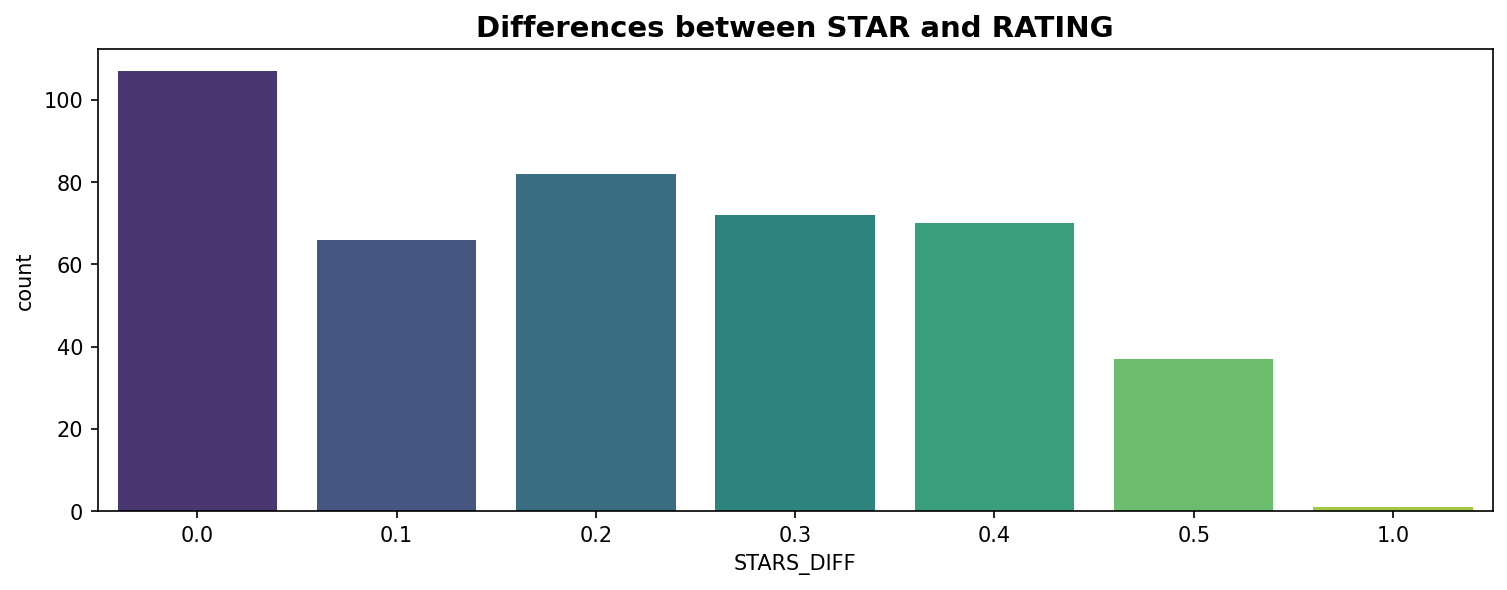

In [49]:
plt.figure(figsize=(12, 4), dpi=150)

sns.countplot(data=filtered_movies, x='STARS_DIFF', palette='viridis')
plt.title('Differences between STAR and RATING', fontsize=14, fontweight='bold')

In [50]:
x = filtered_movies[filtered_movies['STARS_DIFF'] == 1.0]
x 

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### Rating by Rotten Tomatoes.

**Сreating graph rating by 'Rotten tomatoes'.**

Text(0.5, 1.0, 'Rating by Rotten Tomatoes')

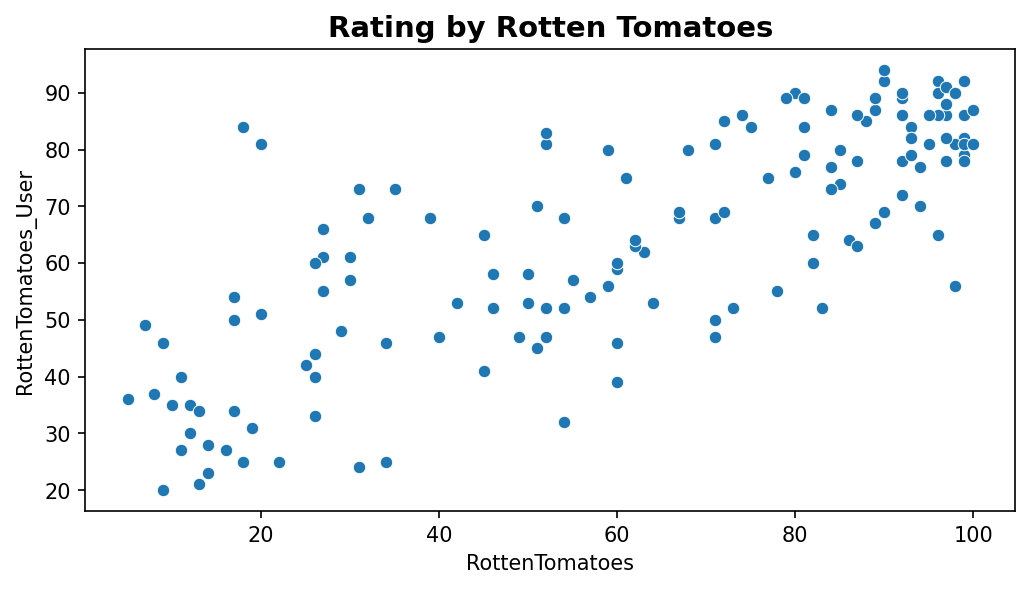

In [51]:
plt.figure(figsize=(8, 4), dpi=150)

sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.title('Rating by Rotten Tomatoes', fontsize=14, fontweight='bold')


**Calculate the difference between critics' and users' ratings on Rotten Tomatoes.**

In [52]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

**Positive values - critics rated higher, negative values - users rated higher.**

In [53]:
avg = all_sites['Rotten_Diff'].apply(abs).mean()
# avg absolute difference between ratings from critics and user ratings.
avg

15.095890410958905

**Creating graph distribution of the difference between critics' and users' ratings.**

Text(0.5, 1.0, 'RT Difference between Critics and Users')

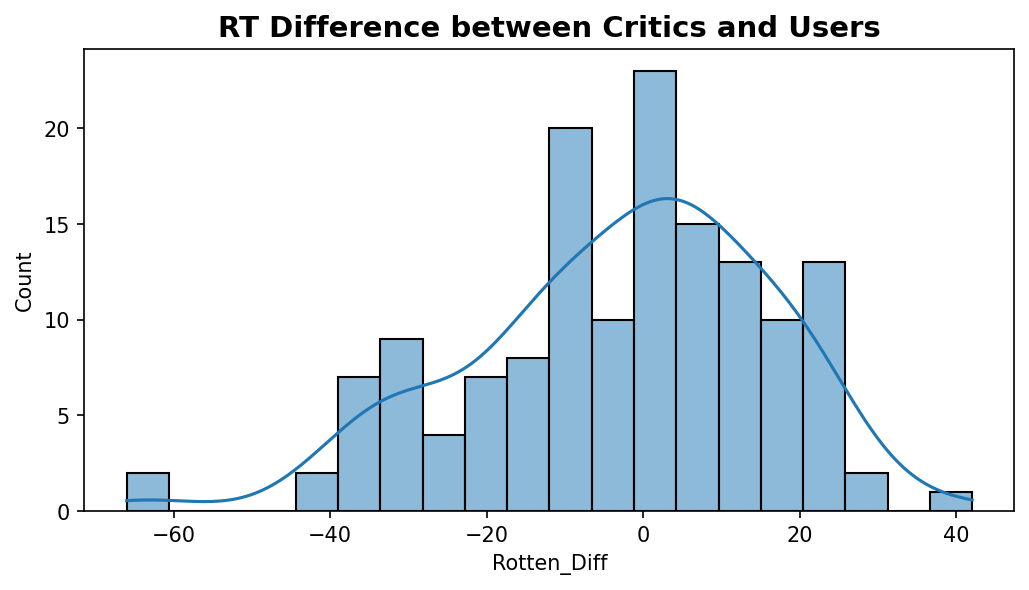

In [54]:
plt.figure(figsize=(8, 4), dpi=150)

sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=20)
plt.title('RT Difference between Critics and Users', fontsize=14, fontweight='bold')


**Top 5 movies that are highest rated by users, compared to ratings from critics.**

In [55]:
top5_mall = all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]
print("Users Love but Critics Hate", '\n', top5_mall)

Users Love but Critics Hate 
                           FILM  Rotten_Diff
3       Do You Believe? (2015)          -66
85           Little Boy (2015)          -61
105    Hitman: Agent 47 (2015)          -42
134    The Longest Ride (2015)          -42
125  The Wedding Ringer (2015)          -39


**Top 5 movies that are highest rated by critics, compared to ratings from users**

In [56]:
top5_high = all_sites.nlargest(5,  'Rotten_Diff')[['FILM',  'Rotten_Diff']]
print("Critics Love, but Users Hate",  '\n', top5_high)

Critics Love, but Users Hate 
                                  FILM  Rotten_Diff
69                  Mr. Turner (2014)           42
112                 It Follows (2015)           31
115          While We're Young (2015)           31
37               Welcome to Me (2015)           24
40   I'll See You In My Dreams (2015)           24


### Rating by MetaCritic.

**Creating graph rating by 'MetaCritic'.**

Text(0.5, 1.0, 'Rating by MetaCritic')

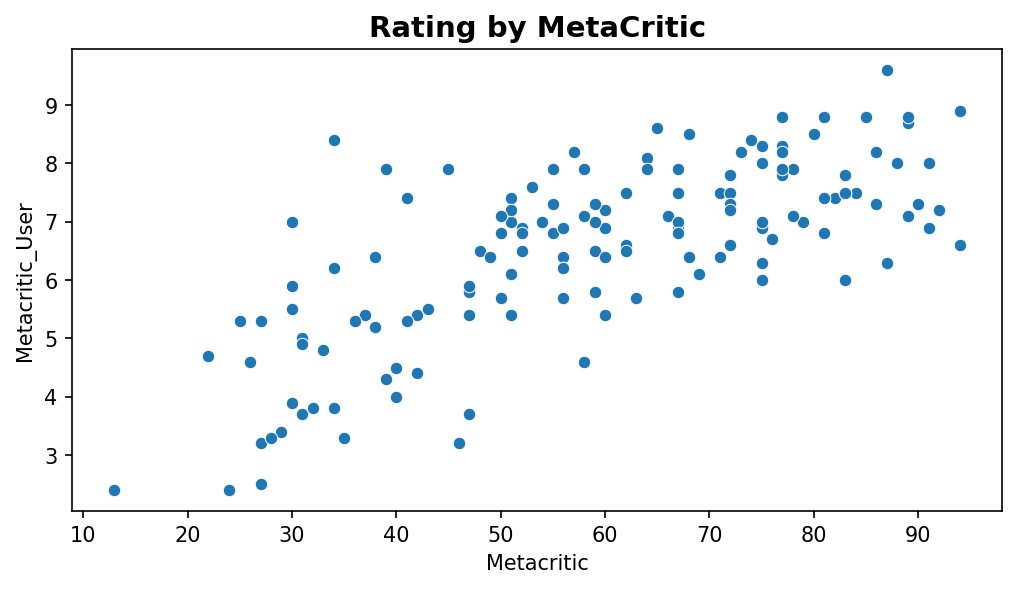

In [57]:
plt.figure(figsize=(8, 4), dpi=150)

sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.title('Rating by MetaCritic', fontsize=14, fontweight='bold')


### Rating by IMDB.

**Creating graph rating by 'IMDB'.**

Text(0.5, 1.0, 'Rating by IMDB')

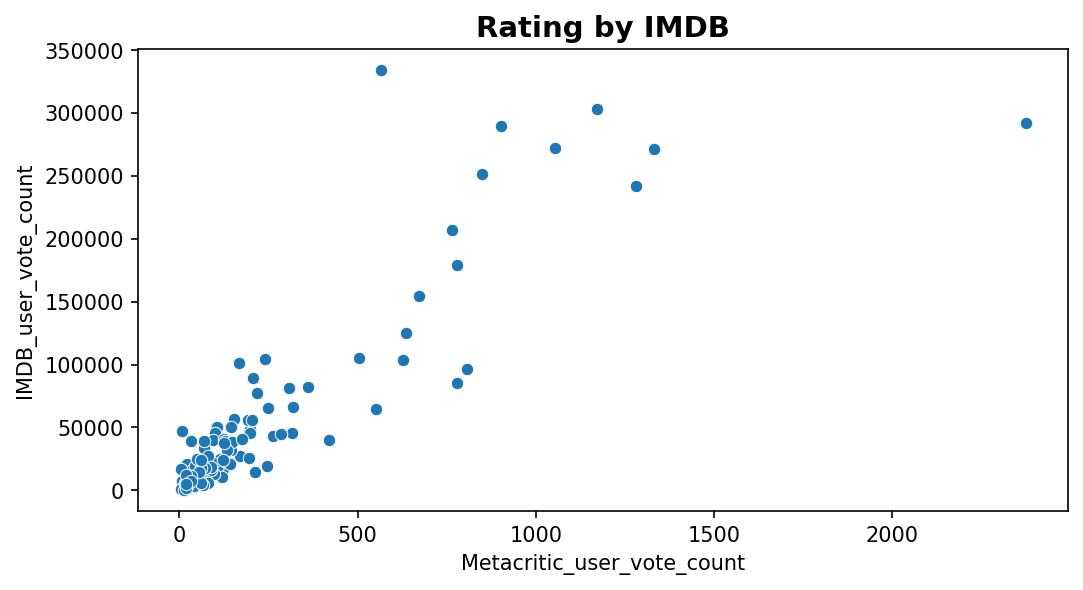

In [58]:
plt.figure(figsize=(8, 4), dpi=150)

sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')
plt.title('Rating by IMDB', fontsize=14, fontweight='bold')


**Selecting the movie that received the most votes on imdb.**

In [59]:
imdb_max = all_sites.nlargest(1, 'IMDB_user_vote_count')
imdb_max

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Selecting the movie that received the most votes on MetaCritic.**


In [60]:
metacritic_max = all_sites.nlargest(1,  'Metacritic_user_vote_count')
metacritic_max

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


###  Comparing Fandango's ratings with those of other companies.

**Merging tables.**

In [61]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')
df.info

<bound method DataFrame.info of                                    FILM  STARS  RATING  VOTES  YEAR  \
0           Fifty Shades of Grey (2015)    4.0     3.9  34846  2015   
1                 Jurassic World (2015)    4.5     4.5  34390  2015   
2                American Sniper (2015)    5.0     4.8  34085  2015   
3                      Furious 7 (2015)    5.0     4.8  33538  2015   
4                     Inside Out (2015)    4.5     4.5  15749  2015   
..                                  ...    ...     ...    ...   ...   
140  Kumiko, The Treasure Hunter (2015)    3.5     3.5     41  2015   
141  The Diary of a Teenage Girl (2015)    4.0     3.6     38  2015   
142            The Wrecking Crew (2015)    4.5     4.2     38  2015   
143                    Tangerine (2015)    4.0     3.9     36  2015   
144            Maps to the Stars (2015)    3.5     3.1     35  2015   

     RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                25                 

In [62]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


**Change of rating scale.**

In [63]:
normalization_parameters = [
    ('RottenTomatoes', 20, 'RT_Norm'),
    ('RottenTomatoes_User', 20, 'RTU_Norm'),
    ('Metacritic', 20, 'Meta_Norm'),
    ('Metacritic_User', 2, 'Meta_U_Norm'),
    ('IMDB', 2, 'IMDB_Norm')
]

# Check if the normalized columns already exist before creating them.

for col, divisor, new_col in normalization_parameters:
    if new_col not in df.columns:
        df[new_col] = np.round(df[col] / divisor, 1)


**Creating new dataframe with normalized ratings.**

In [64]:
norm_scores = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

#### Comparison of rating distributions from different companies.

**Creating graph rotten tomatoes vs fandango.**

(0.0, 5.0)

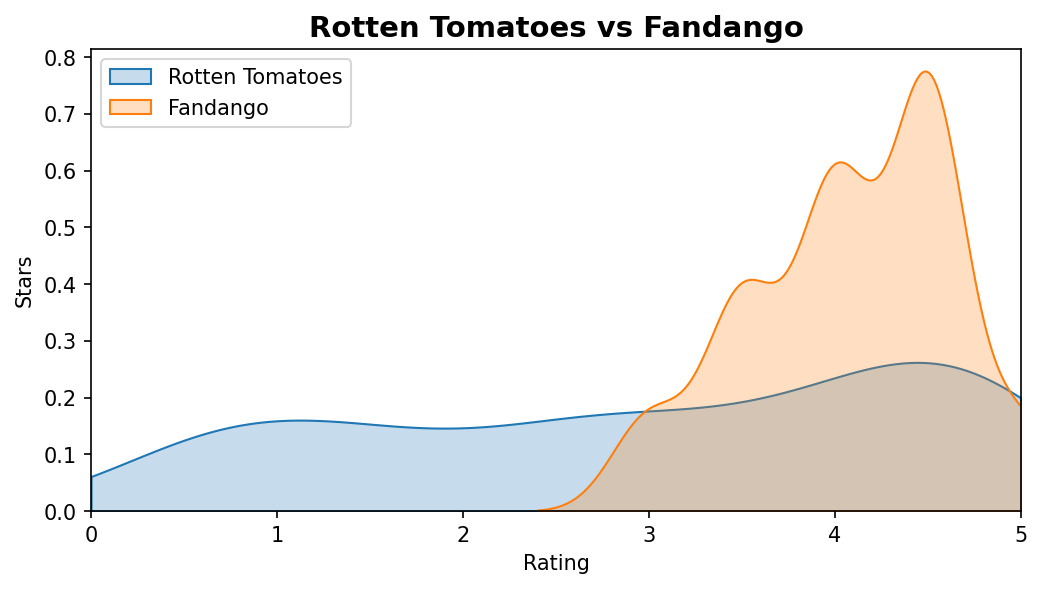

In [65]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

sns.kdeplot(data=norm_scores['RT_Norm'], clip=[0, 5], ax=ax, fill=True, label='Rotten Tomatoes')
sns.kdeplot(data=norm_scores['STARS'], clip=[0, 5], ax=ax, fill=True, label='Fandango')

ax.set_title('Rotten Tomatoes vs Fandango', fontsize=14, fontweight='bold')
ax.set_xlabel('Rating')
ax.set_ylabel('Stars')

ax.legend(loc='upper left')
ax.set_xlim(0, 5)

**Creating graph comparing all normalized ratings.**

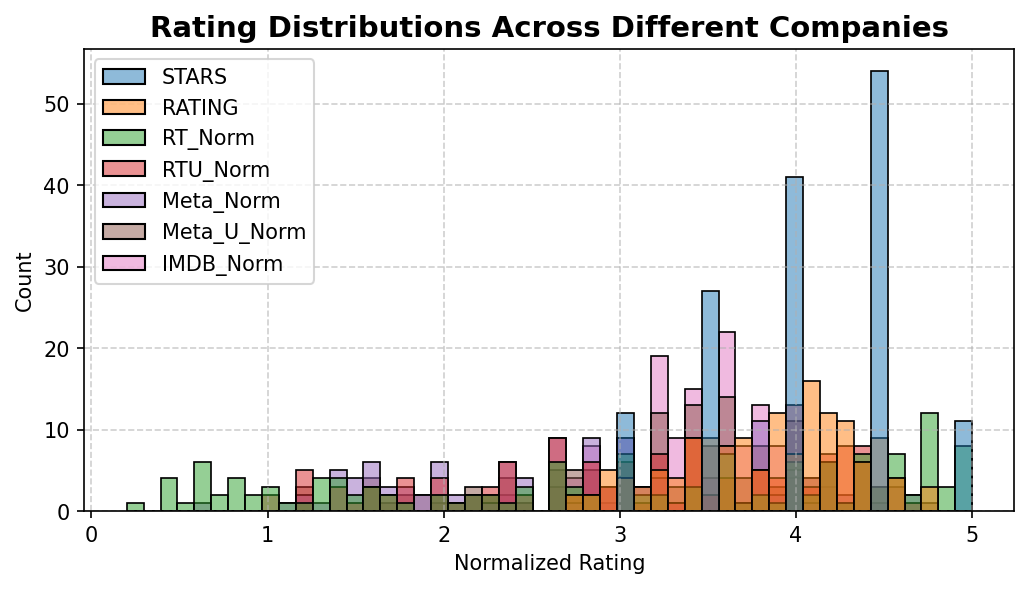

In [66]:
plt.subplots(figsize=(8, 4), dpi=150)

sns.histplot(data=norm_scores, bins=50)
plt.title('Rating Distributions Across Different Companies', fontsize=14, fontweight='bold')

plt.ylabel('Count')
plt.xlabel('Normalized Rating')
plt.grid(True, linestyle='--', alpha=0.6)


**Creating graph comparing ratings from different companies.**

(0.0, 5.0)

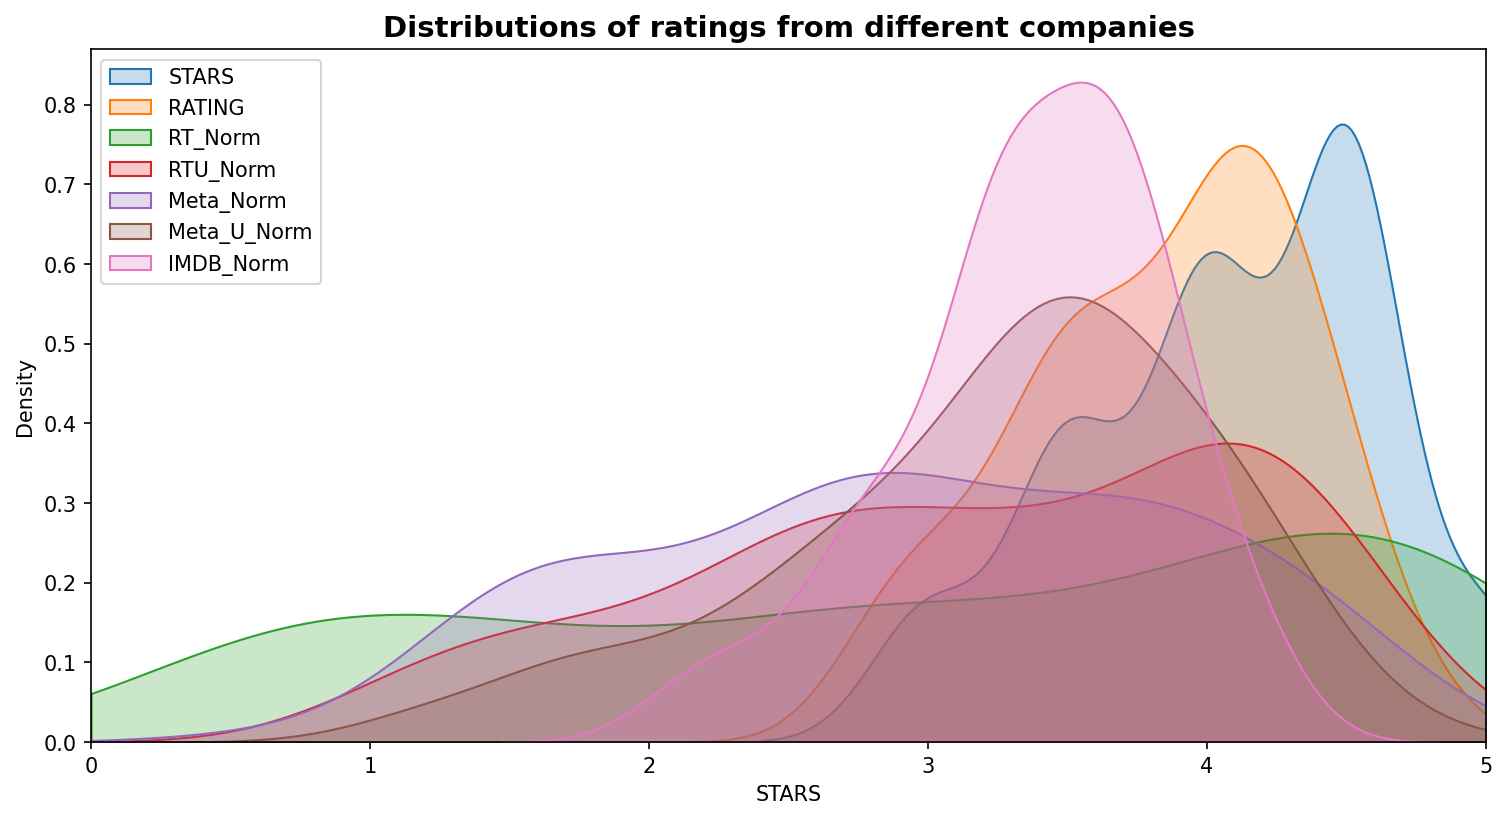

In [67]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)

# Loop for adding data and labels to the legend.
for column in norm_scores.columns:
    sns.kdeplot(data=norm_scores[column], clip=[0, 5], fill=True, ax=ax, label=column)

ax.set_title('Distributions of ratings from different companies', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax.set_xlim(0,  5)


## Fandango's ratings are clearly higher than those of other companies,  especially when you look at the rounded up ratings values.


### Search for the movie that is most different.

**Creating a new pd.**

In [69]:
norm_films = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm', 'FILM']]

**Creating graph Ratings for RT Critic's 10 Worst Reviewed Films.**

*Selects 10 films with lowest 'RT_Norm' ratings, drops 'FILM' column.*

In [70]:
worst_films = norm_films.nsmallest(10, 'RT_Norm').drop('FILM', axis=1)

Text(0.5, 0, 'Rating')

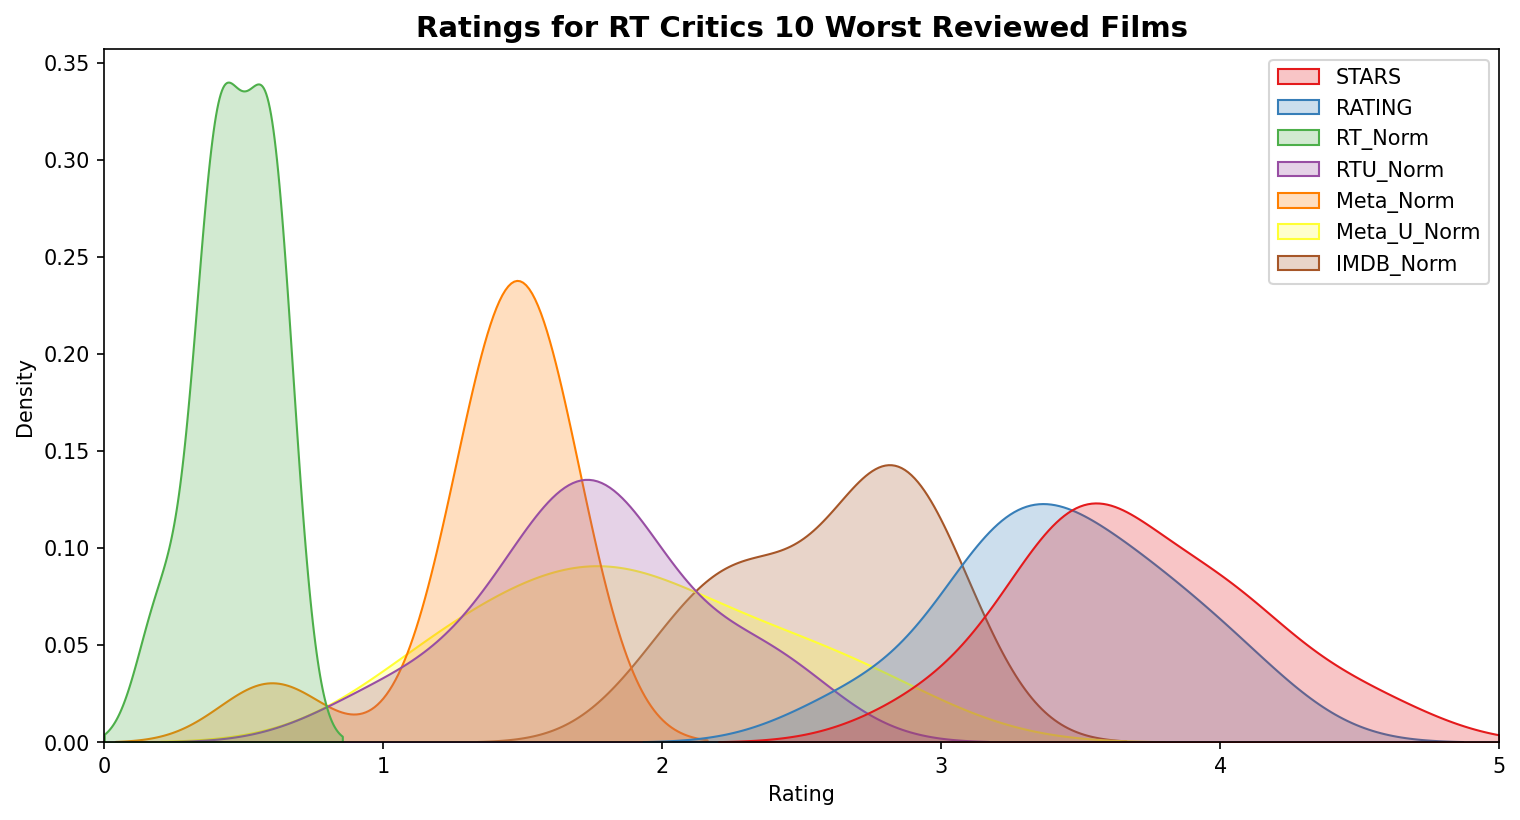

In [71]:
plt.figure(figsize=(12,  6), dpi=150)

sns.kdeplot(data=worst_films, clip=[0, 5], fill=True, palette='Set1')

plt.title('Ratings for RT Critics 10 Worst Reviewed Films',  fontsize=14, fontweight='bold')
plt.xlim(0, 5)
plt.xlabel('Rating')

## The graph shows that there is a movie with a huge difference.

**Let's find him.**

In [72]:
norm_films.nsmallest(10, 'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**There is a movie number 25 with a 4.5 rating. FILM: Taken 3 (2015)**

In [73]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

**Let's find the average rating (without Fandango)**

In [74]:
0.4+2.3+1.3+2.3+3

9.3

In [75]:
9.3/5

1.86

### 1.86 avg rating